In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {c:i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

In [4]:
block_size = 3
X, Y = [], []
for w in words[:5]:
    
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '___>', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ___> e
..e ___> m
.em ___> m
emm ___> a
mma ___> .
olivia
... ___> o
..o ___> l
.ol ___> i
oli ___> v
liv ___> i
ivi ___> a
via ___> .
ava
... ___> a
..a ___> v
.av ___> a
ava ___> .
isabella
... ___> i
..i ___> s
.is ___> a
isa ___> b
sab ___> e
abe ___> l
bel ___> l
ell ___> a
lla ___> .
sophia
... ___> s
..s ___> o
.so ___> p
sop ___> h
oph ___> i
phi ___> a
hia ___> .


In [26]:
C = torch.randn((27, 2))
emb = C[X]
emb[0]

tensor([[-0.4968, -1.3503],
        [-0.4968, -1.3503],
        [-0.4968, -1.3503]])

In [6]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [7]:
test1 = torch.cat( [emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1 )
emb.view(32, -1) == test1  # confirm .view is doing what you want it to

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [8]:
print(f'W1: {W1.shape}')
print(f'emb.view: {emb.view(-1, 6).shape}')

W1: torch.Size([6, 100])
emb.view: torch.Size([32, 6])


In [9]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [10]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [11]:
logits = h @ W2 + b2

In [12]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [13]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.8525)

In [14]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, 2, generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn(100, 27, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [15]:
sum(p.nelement() for p in parameters)

3481

In [16]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [17]:
for p in parameters:
    p.requires_grad = True

In [18]:
lri = []
lossi = []

for i in range(10_000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 10**-1.6 
    for p in parameters:
        p.data += -lr*p.grad
        
    
print(loss.item())

0.36341309547424316


ValueError: x and y must have same first dimension, but have shapes torch.Size([1000]) and (0,)

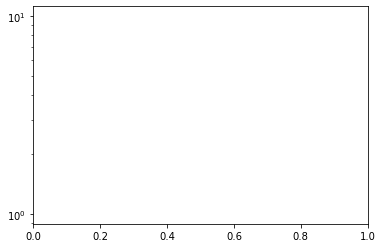

In [19]:
plt.semilogy(lre, lossi)

In [ ]:
torch.randint(0,X.shape[0],(32,), )

In [ ]:
X.shape